# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

## Exploratory Data Analysis 

In [5]:
empresa = pd.read_csv('data/Advertising.csv', index_col = 0)
empresa

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [ ]:
empresa['newpaper'].replace('6s9.2', 69.2, inplace = True)

In [30]:
empresa['newpaper'] = empresa['newpaper'].astype('float64')
empresa.rename(columns = {'newpaper' : 'newspaper'}, inplace = True)

In [31]:
empresa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


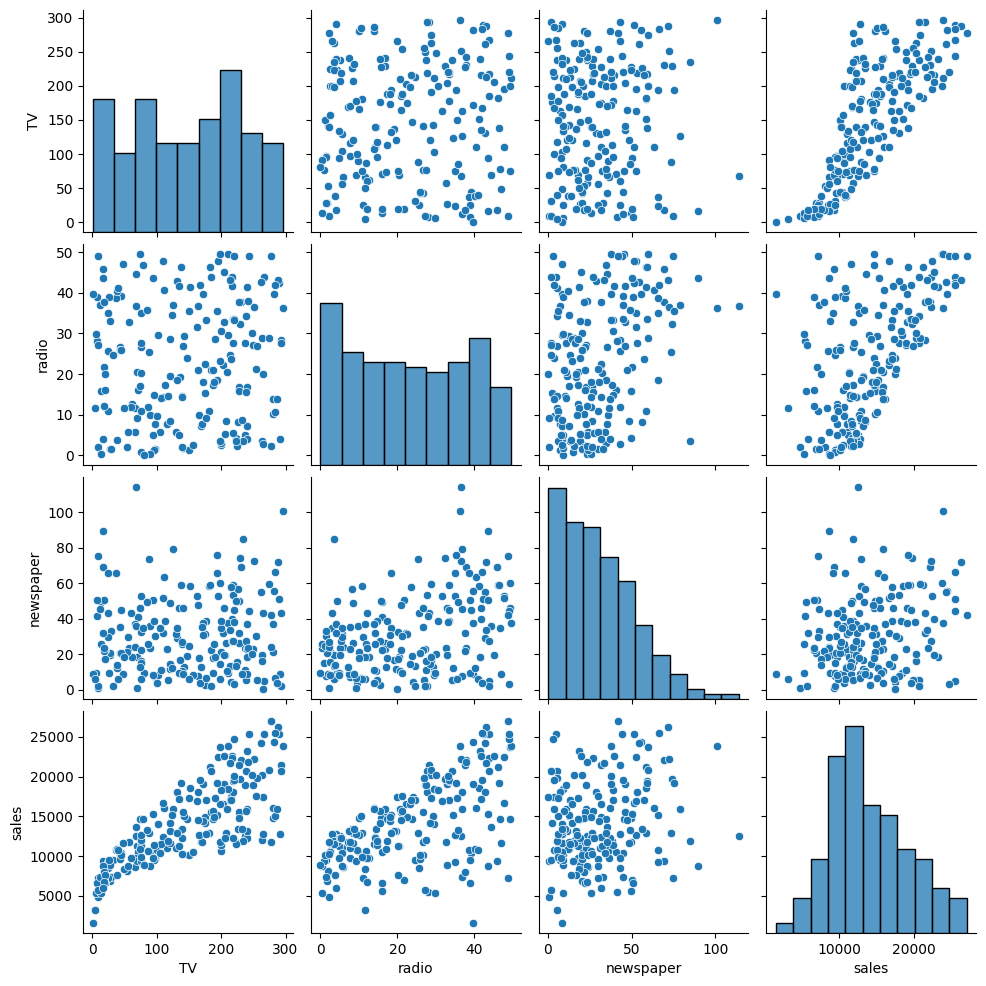

In [32]:
sns.pairplot(data = empresa)

In [33]:
empresa.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

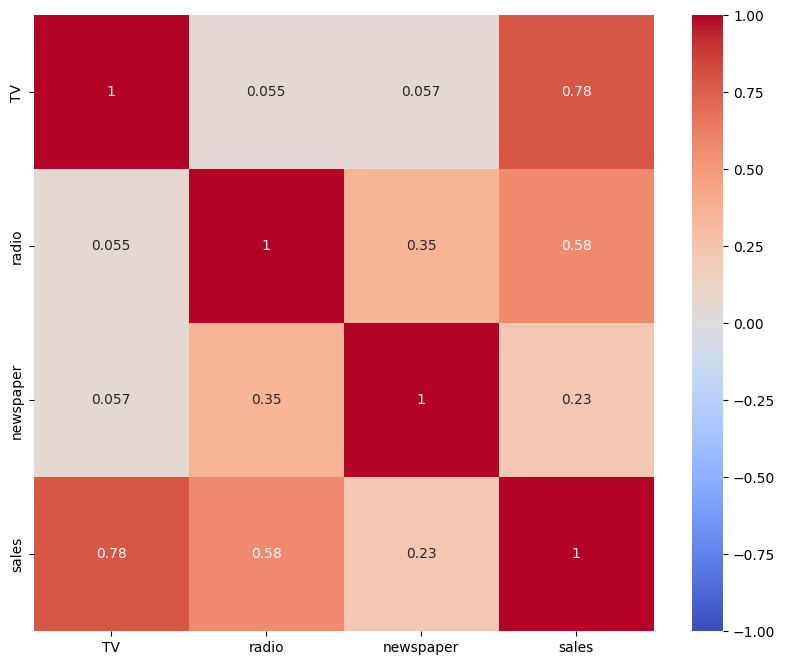

In [34]:
plt.figure(figsize = (10,8))
sns.heatmap(data = empresa.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)

<Axes: xlabel='TV', ylabel='sales'>

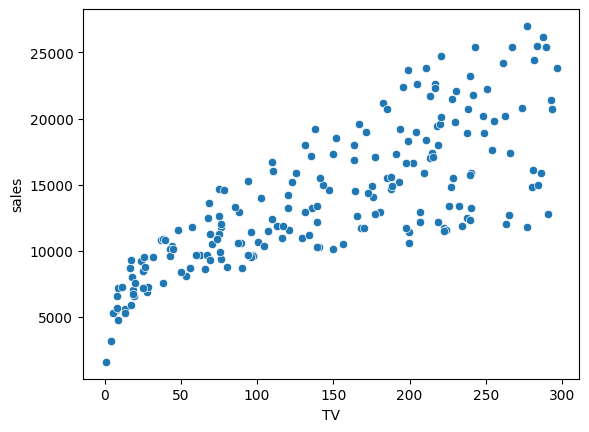

In [35]:
sns.scatterplot(data = empresa, x = 'TV', y = 'sales')

<Axes: xlabel='radio', ylabel='sales'>

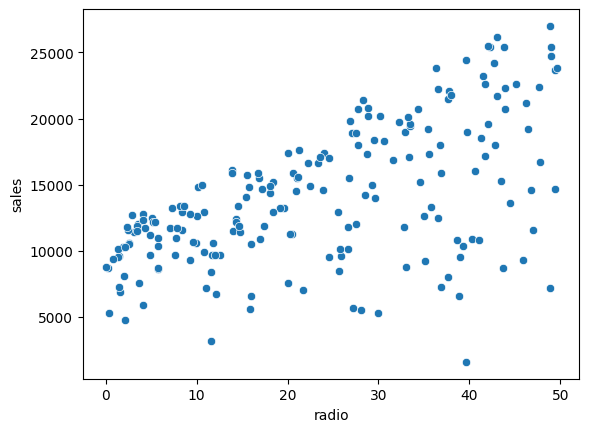

In [36]:
sns.scatterplot(data = empresa, x = 'radio', y = 'sales')

## Modelado

In [45]:
# no se utiliza newspaper debido a la alta correlación que tiene con radio
X = empresa[['TV', 'radio']]
y = empresa['sales']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (160, 2)
X_test: (40, 2)
y_train: (160,)
y_test: (40,)


In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("r2_score", r2_score(y_test, y_pred))

MAE 1444.3023138227582
MSE 3137948.009068354
RMSE 1771.4254173033519
MAPE 0.1509025619630508
r2_score 0.9005833101920356


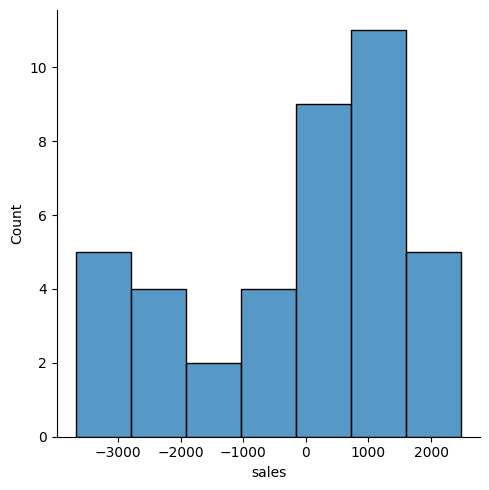

In [49]:
sns.displot(y_test - y_pred)

Text(0.5, 0, 'test')

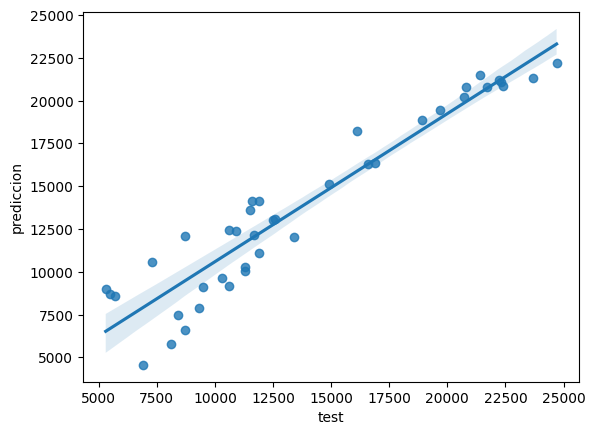

In [50]:
sns.regplot(data = [y_test, y_pred], x = y_test, y = y_pred)
plt.ylabel(ylabel = 'prediccion')
plt.xlabel(xlabel = 'test')

#### Debemos de aumentar o reducir la la complejidad de nuestros modelos?

In [51]:
# aumentar primeramente
from sklearn.preprocessing import PolynomialFeatures

In [52]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X)
x_poly

array([[1.000000e+00, 2.301000e+02, 3.780000e+01, 5.294601e+04,
        8.697780e+03, 1.428840e+03],
       [1.000000e+00, 4.450000e+01, 3.930000e+01, 1.980250e+03,
        1.748850e+03, 1.544490e+03],
       [1.000000e+00, 1.720000e+01, 4.590000e+01, 2.958400e+02,
        7.894800e+02, 2.106810e+03],
       ...,
       [1.000000e+00, 1.770000e+02, 9.300000e+00, 3.132900e+04,
        1.646100e+03, 8.649000e+01],
       [1.000000e+00, 2.836000e+02, 4.200000e+01, 8.042896e+04,
        1.191120e+04, 1.764000e+03],
       [1.000000e+00, 2.321000e+02, 8.600000e+00, 5.387041e+04,
        1.996060e+03, 7.396000e+01]], shape=(200, 6))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)
pred = pol_reg.predict(X_test)

In [56]:
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE", mean_squared_error(y_test, pred) ** (1/2))
print("MAPE", mean_absolute_percentage_error(y_test, pred))
print("r2_score", r2_score(y_test, pred))
print("pol_reg score", pol_reg.score(x_poly, y))

MAE 493.4820298266892
MSE 364155.872791575
RMSE 603.4532896517965
MAPE 0.04792656983514052
r2_score 0.9884627879931582
pol_reg score 0.9860250540533058


In [58]:
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)
pred = pol_reg.predict(X_test)

In [59]:
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE", mean_squared_error(y_test, pred) ** (1/2))
print("MAPE", mean_absolute_percentage_error(y_test, pred))
print("r2_score", r2_score(y_test, pred))
print("pol_reg score", pol_reg.score(x_poly, y))

MAE 335.8526633159307
MSE 178710.4302957809
RMSE 422.7415644288848
MAPE 0.03233555862889874
r2_score 0.9943380835619904
pol_reg score 0.9911132583591393


In [61]:
from sklearn.linear_model import Ridge

In [88]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

coef_ridge = []
err_ridge = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test)
    ridge_error = mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)

c:\Users\Alumno-14\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.11821e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Alumno-14\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.31592e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Alumno-14\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.54859e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Alumno-14\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.8224e-20): result may not be accurate.
  retu

In [89]:
min(err_ridge)

178684.00033765222

In [90]:
alphas[np.array(err_ridge).argmin()]

np.float64(27.825594022071257)

In [91]:
ridgeR = Ridge(alpha = 27.82)
ridgeR.fit(X_train, y_train)

print("MAE", mean_absolute_error(y_test, ridgeR.predict(X_test)))
print("MSE", mean_squared_error(y_test, ridgeR.predict(X_test)))
print("RMSE", mean_squared_error(y_test, ridgeR.predict(X_test)) ** (1/2))
print("MAPE", mean_absolute_percentage_error(y_test, ridgeR.predict(X_test)))
print("r2_score", r2_score(y_test, ridgeR.predict(X_test)))

MAE 335.14199405903753
MSE 178684.00049133587
RMSE 422.71030327085225
MAPE 0.03219436532902181
r2_score 0.9943389209129161


In [74]:
from sklearn.linear_model import Lasso

In [98]:
lassoR = Lasso(alpha=10)
lassoR.fit(X_train, y_train)

print("MAE", mean_absolute_error(y_test, lassoR.predict(X_test)))
print("MSE", mean_squared_error(y_test, lassoR.predict(X_test)))
print("RMSE", mean_squared_error(y_test, lassoR.predict(X_test)) ** (1/2))
print("MAPE", mean_absolute_percentage_error(y_test, lassoR.predict(X_test)))
print("r2_score", r2_score(y_test, lassoR.predict(X_test)))

MAE 329.3470685682014
MSE 176565.20948973703
RMSE 420.19663193526077
MAPE 0.03137621289694361
r2_score 0.994406048598641


c:\Users\Alumno-14\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.110e+07, tolerance: 4.150e+05
  model = cd_fast.enet_coordinate_descent(


## Resultados

In [ ]:
# Podemos concluir que el modelo no va a ser 100% preciso a futuras muestras, sin embargo, al hacer ridge regression,
# aumenta considerablemente el r2, es casi 1, por lo que los valores que se obtienen son casi perfectos
# y además al hacer lassoR regression, aumenta aún más que con ridge, por lo que es aún más preciso.
# Cabe mencionar también que para ambos casos se ha usado una regresión polinómica.

Text(0.5, 0, 'test')

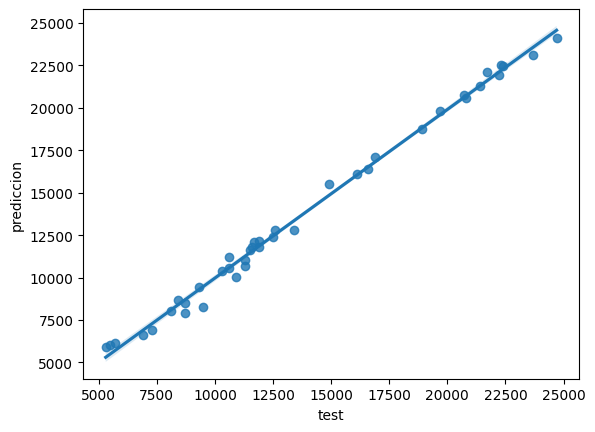

In [101]:
# Gráfica con regresión lassoR
sns.regplot(data = [y_test, lassoR.predict(X_test)], x = y_test, y = lassoR.predict(X_test))
plt.ylabel(ylabel = 'prediccion')
plt.xlabel(xlabel = 'test')

Text(0.5, 0, 'test')

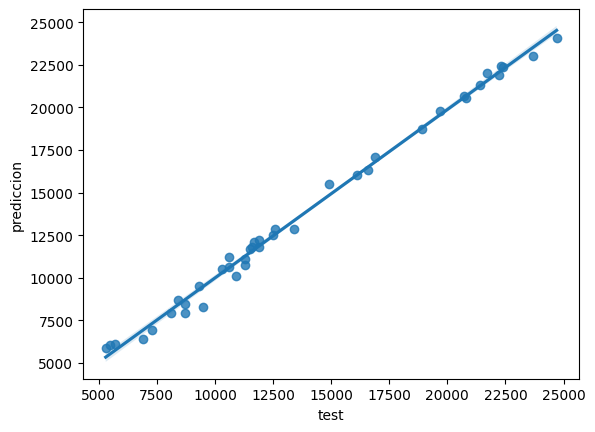

In [102]:
# Gráfica con regresión lassoR
sns.regplot(data = [y_test, ridgeR.predict(X_test)], x = y_test, y = ridgeR.predict(X_test))
plt.ylabel(ylabel = 'prediccion')
plt.xlabel(xlabel = 'test')